# Filtering in the frequency domain
Goal: Get familiar with the representation of an image in the frequency domain and perform frequency filtering 

In [134]:
# Uncomment this if scikit-image is not available
#!pip install scikit-image

# Clone the repository. Uncomment this line if it you want to get a local copy of the repository.
# !git clone https://gricad-gitlab.univ-grenoble-alpes.fr/dallamum/IIP.git

# Pull updates from the git repository. Uncomment this line if you already have cloned the repository and you want to update it. In this case, this file should belong to the repository.
# !git pull https://gricad-gitlab.univ-grenoble-alpes.fr/dallamum/IIP.git

## Setup

In [135]:
# Load libraries
import imageio
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as ft

from skimage import data, img_as_float
from skimage import exposure
from skimage import color as col
from skimage.exposure import rescale_intensity
from skimage import filters
from skimage.filters import gaussian

from skimage.draw import disk

from scipy import ndimage
from scipy.ndimage import convolve as conv
from scipy.ndimage import correlate as corr


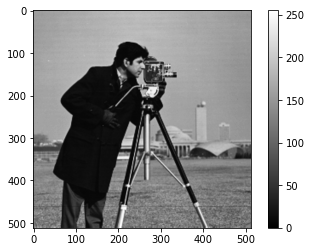

In [136]:
# Load an image
f = data.camera()
plt.imshow(f, cmap='gray')
plt.colorbar()
plt.show()

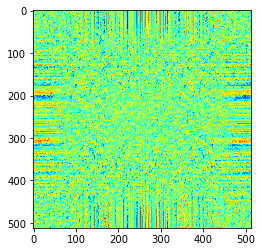

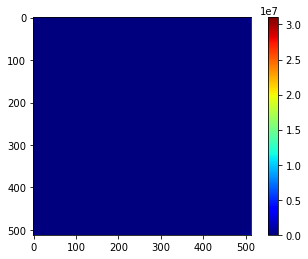

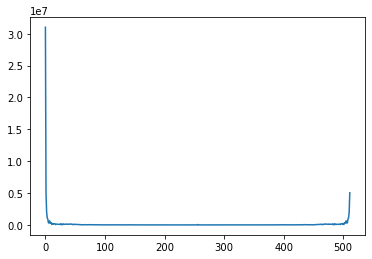

In [137]:
# Compute FT
F = ft.fft2(f)

Fm = np.abs(F)
Fp = np.angle(ft.fftshift(F))

plt.figure
plt.imshow(Fp, cmap='jet')
plt.show()

# Show the spectrum
plt.figure
plt.imshow(np.abs(F).astype(int), cmap='jet')
plt.colorbar()
plt.show()

# Plot first line
plt.figure
plt.plot(np.abs(F[0,:]))
plt.show()


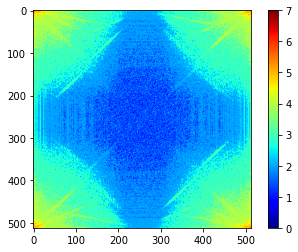

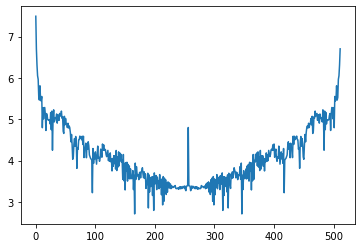

In [138]:
# Increase contrast in the low values by computing the log

# Show the spectrum
plt.figure
plt.imshow(np.log10( 0.1 + np.abs(F)).astype(int), cmap='jet')
plt.colorbar()
plt.show

# Plot first line
plt.figure()
plt.plot(np.log10( 0.1 + np.abs(F[0,:])))
plt.show()



In [139]:
# Shift the quadrants for having the origin at the center of the image
# Show the spectrum
plt.figure
plt.imshow(np.log10( 0.1 + np.abs(ft.fftshift(F))).astype(int), cmap='jet')
plt.colorbar()
plt.show()

# Plot first line
plt.figure()
plt.plot(np.log10( 0.1 + np.abs(ft.fftshift(F[0,:]))))
plt.show()

 

In [148]:
# Generate a synthetic spectrum and get the corresponding image
a1 = np.zeros((30,30))
a1[0,0] = 1
a2 = np.zeros((30,30))
#a2[5,2] = 1

# Syntheitic spectrum (abs value, phase is zero)
b = np.concatenate((np.concatenate((a2[::-1,::-1],a1[::-1,:]), axis=1),
     np.concatenate((a1[::,::-1], a2[:,:]), axis=1)), axis=0)

# Get back to the image domain
c = ft.ifft2(ft.fftshift(b.astype(np.complex)))

# Plot
plt.figure
plt.subplot(121)
plt.imshow(b)
plt.title('Magnitude spectrum')

plt.subplot(122)
plt.imshow(np.abs(c))
plt.title('Image')
plt.show()



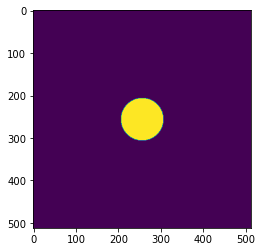

In [151]:
# Ideal low-pass filter

f_cutoff = 50

shape = f.shape
K_ideal = np.zeros(shape, dtype=np.uint8)
rr, cc = disk((np.floor(shape[0]/2).astype(np.int), np.floor(shape[1]/2).astype(np.int)), f_cutoff, shape=shape)
K_ideal[rr,cc] = 1
K_ideal = K_ideal

plt.figure
plt.imshow(K_ideal)

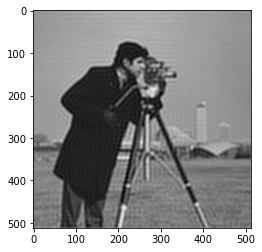

In [152]:
# Apply filter

F = ft.fft2(f)
K_ideal = ft.fftshift(K_ideal)
g = np.real(ft.ifft2(F*K_ideal))

plt.figure
plt.imshow(g, cmap='gray')
plt.show()

## Test
- Change the filter parameters and see the effects
- Implement an ideal High Pass filter in the frequency domain